# Método Montecarlo
## Primera ronda: Si saca 7 o 11 gana, si saca 2,3, 12 pierde
### Segunda ronda: El resultado sacado Primera ronda=dados gana, si sale 7 pierde
### Siguientes rondas: continua tirando hasta se cumpla la segunda ronda

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

# Descripción programa:

## Se pide el número de muestras a utilizar y las demostraciones a realizar
## En el gráfico se puede ver el número de demostraciones con los puntos y la linea azul,
## y la media de esos puntos.

### En el caso que solo queremos una demostración dejamos el input de número de demostraciones a 1


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

La media de victoria con 50 demostraciones de 100000000 muestras es: 0.4977209885561749


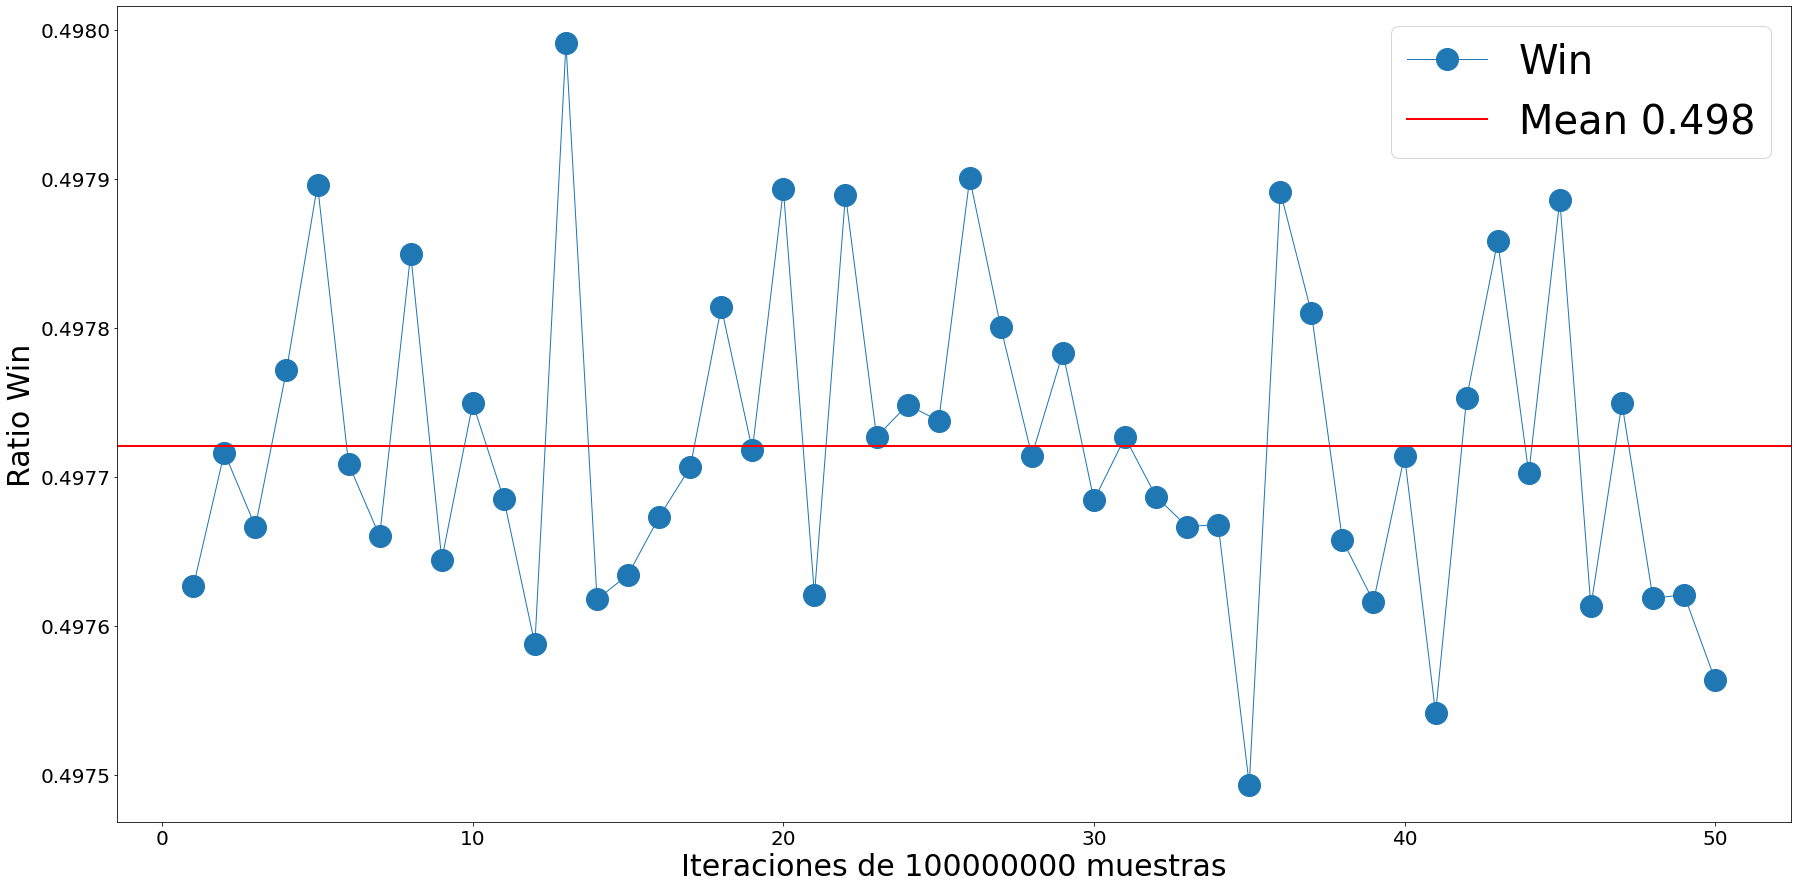

In [5]:


M=100000000
Z=50  
           ### Para hacerlo interactivo ###
#M = input("Número de muestras utilizadas en cada demostración: ") #Numero de muestras
#Z= input("Número de demostraciones: ") #Numero de iteraciones
#M=int(M)
#Z=int(Z)
              ###########################

def Montecarlo(N):
    results=[]
    Total_win = []
    Total_lose=[]
    Total_w = []
    Total_l=[]
    Total_N=[]
    ND=0
    active=0
    g=0
    sg=0
    p=0
    sp=0
    Resta_N=0
    
    for i in range(N):
        #Comb = np.arange(36)    ###conmbinaciones totales dados
        Dado1= np.random.choice(6,1)+1
        Dado2= np.random.choice(6,1)+1
        Total_dados=Dado1+Dado2  
        results.append(Total_dados) 
    
        if (((Total_dados == 7) or (Total_dados == 11)) and (active == 0)):
            g=g+1
        elif ((Total_dados==2 or Total_dados==3 or Total_dados==12) and active==0):
            p=p+1 
        else:
            active=1
            if results[i]==results[i-1]:
                sg=sg+1
                active=0
            elif Total_dados==7:
                sp=sp+1
                active=0
            else:
                Resta_N=Resta_N+1 
                
               
        
    ##Calculamos las parciales, primera victoria, o en las secundarias
    ND=N-Resta_N
    First_win=g/(ND)     
    First_lose=p/(ND)        
    Second_win=sg/(ND)
    Second_lose=sp/(ND)
    
    Total_win=First_win+Second_win
    Total_lose=First_lose+Second_lose
    Total_w.append(First_win+Second_win)
    Total_l.append(First_lose+Second_lose)
    Total_N.append(ND) 
   
    return Total_win, Total_lose,ND


def Montecarlo_to_plot(W):
    WIN=[]
    LOSE=[]
    N_TOTAL=[]
    
    for x in range(Z):   
        W,L,DN=Montecarlo(M);
        WIN.append(W)
        LOSE.append(L)
        N_TOTAL.append(DN)
    df=pd.DataFrame({'Win':WIN, 'Lose':LOSE,'Ntot':N_TOTAL})
    df['in'] = df.index+1
    return df

Data=Montecarlo_to_plot(Z);
m=Data['Win'].mean() ##Sacamos la media de las demostraciones


############################       Ploteamos     ############################################### 
fig = plt.figure
Data.plot(y='Win',x='in',marker='o', markersize=22, linewidth=1,use_index=True, kind = 'line',figsize=(30, 15))
plt.rc('xtick', labelsize=40)    # fontsize of the tick labels
plt.rc('ytick', labelsize=40) 
plt.xlabel('Iteraciones de '+str(M)+" muestras", fontsize=30)
plt.ylabel('Ratio Win', fontsize=30)
m_legend=round(m,3)
plt.axhline(y=m, linewidth=2, color='r', label='Mean '+ str(m_legend))
plt.legend(fontsize=40)

print("La media de victoria con "+str(Z)+" demostraciones de "+ str(M)+" muestras es: "+str(m))





    